In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the text file into a pandas dfFrame
df = pd.read_csv(f'../data/IrrDemandEgypt.txt', sep='\t', header=None)  
df

,0
0,1310.483871
1,1620.370370
2,1635.304659
3,1589.506173
4,1896.654719
...,...
235,2202.807646
236,1601.080247
237,1452.359618
238,1481.481481


In [4]:
# Create a date range from January 2000 to December 2020
date_range = pd.date_range(start='2000-01-01', end='2020-01-01', freq='M')
df.index = date_range
# Rename the column header
df.rename(columns={0: 'Water_deficit'}, inplace=True)
df

,Water_deficit
2000-01-31,1310.483871
2000-02-29,1620.370370
2000-03-31,1635.304659
2000-04-30,1589.506173
2000-05-31,1896.654719
...,...
2019-08-31,2202.807646
2019-09-30,1601.080247
2019-10-31,1452.359618
2019-11-30,1481.481481


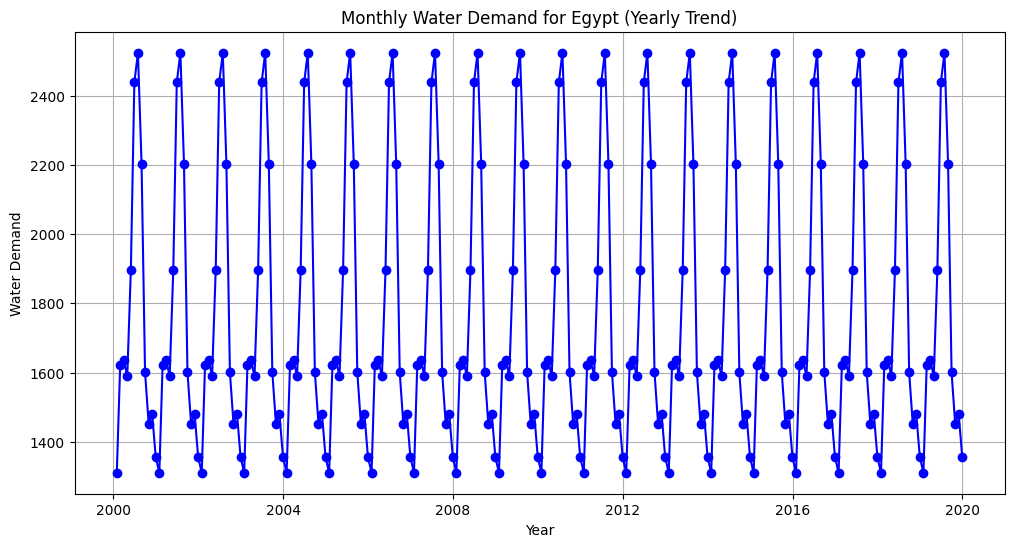

In [5]:
# Assuming 'df' is your dfFrame with the water demand values and an index with dates

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Water_deficit'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Water Demand')
plt.title('Monthly Water Demand for Egypt (Yearly Trend)')
plt.grid(True)
plt.show()

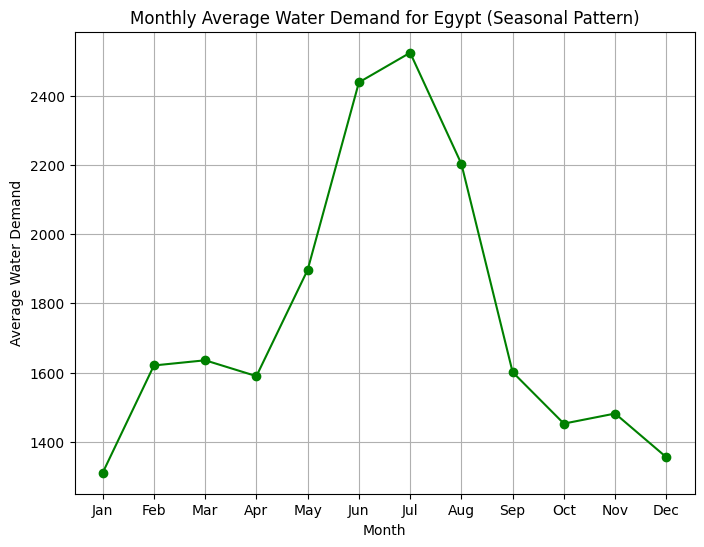

In [6]:
# Assuming 'df' is your dfFrame with the water demand values and an index with dates
# Extract month and year from the index
df['Month'] = df.index.month
df['Year'] = df.index.year

# Calculate the average demand for each month
monthly_avg_demand = df.groupby('Month')['Water_deficit'].mean()

plt.figure(figsize=(8, 6))
plt.plot(monthly_avg_demand.index, monthly_avg_demand.values, marker='o', linestyle='-', color='g')
plt.xlabel('Month')
plt.ylabel('Average Water Demand')
plt.title('Monthly Average Water Demand for Egypt (Seasonal Pattern)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

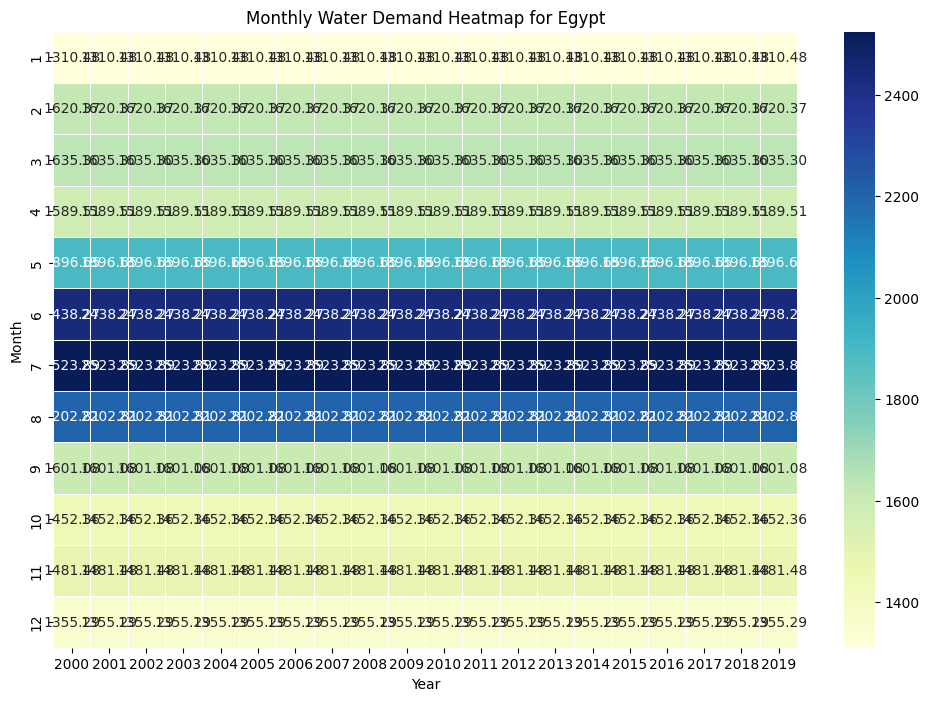

In [8]:
# Assuming 'data' is your DataFrame with the water demand values and an index with dates
# Pivot the data for creating a heatmap
pivot_data = df.pivot_table(index='Month', columns='Year', values='Water_deficit', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Monthly Water Demand Heatmap for Egypt')
plt.show()
